## Lab Submission 2
## Zohair Mubasheer Ahmed - 8897082

- This lab provides insight into the concept of probability and statistical measures that you could use to classify the data as spam or not spam and also clean the data by removing the outliers using measures of central tendency and dispersion. The datasets have been enclosed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

1. Use the **Lab2 dataset** provided. Load the dataset and split it into test and train. After that, train the model using Gaussian and Multinominal classifiers and post which model performs better. Use the trained model to perform some predictions on test data.


In [2]:
spam_info = pd.read_csv('../../practical_labs/Lab2_dataset.csv')
spam_info

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


- Perform Preprocessing
- Counting null values.

In [3]:
spam_info.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [4]:
pd.unique(spam_info.iloc[:,3])

array([0, 1])

- Since column 2 and column 4 contain redundant information regarding the classification of emails as spam or ham(not spam), we can safely remove one of the columns. Both columns represent the same concept of labeling emails as either spam or ham(not spam). By eliminating column 2, we eliminate the duplication of information, making the dataset more concise and avoiding unnecessary redundancy.

- Removing Unnamed:0 as it doesn't provide much contribution.

In [5]:
spam_info = spam_info.drop(columns=spam_info.columns[[0,1]])
spam_info

,text,label_num
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0
...,...,...
5166,Subject: put the 10 on the ft\nthe transport v...,0
5167,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,Subject: industrial worksheets for august 2000...,0


- Changing headings

In [6]:
spam_info = spam_info.rename(columns={'text': 'message', 'label_num': 'spam'})
spam_info

,message,spam
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0
...,...,...
5166,Subject: put the 10 on the ft\nthe transport v...,0
5167,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,Subject: industrial worksheets for august 2000...,0


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(spam_info.iloc[:,0])
X.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), spam_info.iloc[:,1], test_size=0.2, random_state=42)

In [9]:
gaussiannb = GaussianNB()
gaussiannb_predictions = gaussiannb.fit(X_train, y_train).predict(X_test)
gaussiannb_accuracy = accuracy_score(y_test, gaussiannb_predictions)
print("Gaussian Naive Bayes accuracy:")
print(gaussiannb_accuracy)

Gaussian Naive Bayes accuracy:
0.9545893719806763


In [10]:
multinomialnb = MultinomialNB()
multinomialnb_predictions = multinomialnb.fit(X_train, y_train).predict(X_test)
multinomialnb_accuracy = accuracy_score(y_test, multinomialnb_predictions)
print("Multinomial Naive Bayes accuracy:")
print(multinomialnb_accuracy)

Multinomial Naive Bayes accuracy:
0.978743961352657


- Perform predictions on the test data using the best performing model

In [11]:
best_model = gaussiannb if gaussiannb_accuracy > multinomialnb_accuracy else multinomialnb
predictions = best_model.predict(X_test)
display(predictions)

array([0, 1, 0, ..., 1, 0, 0])

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, predictions, average='macro', zero_division=0)
recall = recall_score(y_test, predictions, average='macro', zero_division=0)
f1 = f1_score(y_test, predictions, average='macro', zero_division=0)

print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)


Precision: 0.9738162700201467
Recall: 0.9738162700201467
F-score: 0.9738162700201467


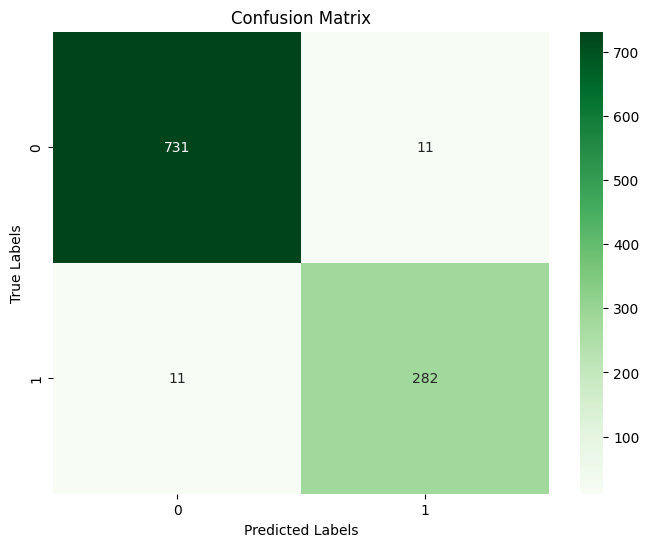

In [13]:
import seaborn as sns

confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

- The observed accuracy of both Naive Bayes models where Multinomial Naive Bayes accuracy is greater than Gaussian Naive Bayes accuracy.
- While accuracy is a commonly used metric for evaluating the performance of a classification model, it may not provide a complete picture of the model's effectiveness. It's essential to consider additional evaluation metrics, such as precision, recall, and F1-score, to obtain a more comprehensive assessment. These metrics provide insights into the model's ability to correctly identify positive and negative instances, as well as the balance between precision (correctly classified positive instances) and recall (ability to capture all positive instances). By considering these metrics alongside accuracy, we can gain a more thorough understanding of the model's performance and its strengths and limitations.

# Part B

Use this **air bnb new york city dataset** and remove outliers based on price per night for a given apartment/home. 
You can demonstrate why using other techniques like mean/median/ percentile works. 
The task is to come up with a clean dataset that does not have outliers showcasing all the possibilities.


- Load Dataset and print

In [14]:
airbnb_info = pd.read_csv('../../practical_labs/AB_NYC_2019.csv')
airbnb_info.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


- Summary of the Price attribute

In [15]:
airbnb_info.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

- Conditioning the Data
- Checking Nulls

In [16]:
airbnb_info.price.isnull().sum()

0

- Plotting the Count vs price Data

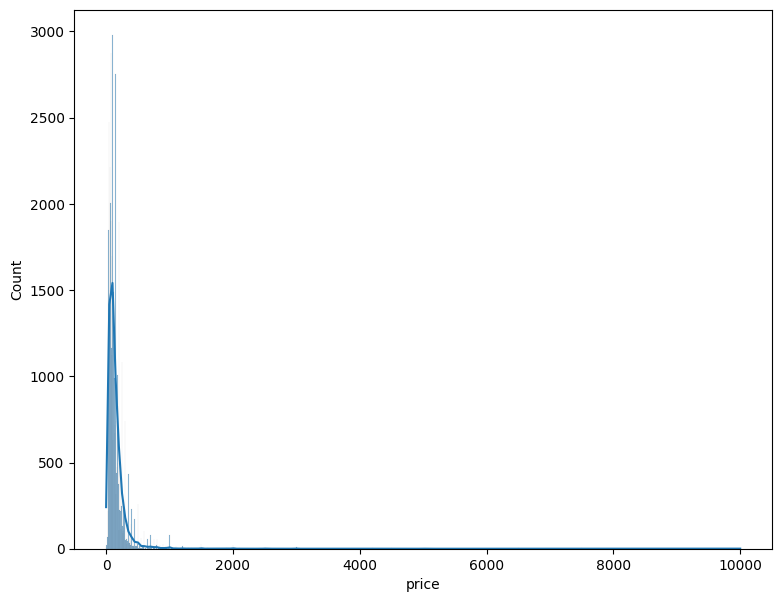

In [17]:
fig = plt.figure(figsize=(9,7))
sns.histplot(airbnb_info.price, kde=True)
plt.show()

- Calculating the outliers based on the mean and standard deviation

In [18]:
price_mean = airbnb_info['price'].mean()
price_sd = airbnb_info['price'].std()

minimum = price_mean - (3 * price_sd)
maximum = price_mean + (3 * price_sd)

removed_outliers = airbnb_info[(airbnb_info['price'] >= minimum) & (airbnb_info['price'] <= maximum)]
removed_outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


- Removing outliers based on median

In [19]:
median_price = airbnb_info['price'].median()

mad = np.median(np.abs(airbnb_info['price']- median_price))

# setting boundary for outliers
minimum = median_price - (3 * mad)
maximum = median_price + (3 * mad)

removed_outliers_median = airbnb_info[(airbnb_info['price'] >= minimum) & (airbnb_info['price'] <= maximum)]
removed_outliers_median


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


- Using Quantiles to remove outliers

In [20]:
lower_percentile = airbnb_info['price'].quantile(0.01)
upper_percentile = airbnb_info['price'].quantile(0.99)

removed_outliers_percentile = airbnb_info[(airbnb_info['price'] >= lower_percentile) & (airbnb_info['price'] <= upper_percentile)]

removed_outliers_percentile


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
